## Pandas and Numpy - Basics for data handling

#### Clean data to handle errors, missing values ...

#### Apply statistical techniques to better understand the data, and how the sample might be expected to represent the real-world population of data, allowing for random variation.

#### Visualize data to determine relationships between variables, and in the case of a machine learning project, identify features that are potentially predictive of the label.

In [9]:
import pandas as pd
import numpy as np

In [10]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
grades = np.array(data)


# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

In [11]:

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students.head(6)
# OR
df_students.loc[0:5]
# OR
df_students.iloc[0:6]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In [12]:
#### Operations with DataFrame, indexing, filtering, selecting...
print(f"Fifth Row details: \n{df_students.loc[5]}")

Fifth Row details: 
Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object


In [13]:
print(f"Fifth Row details: \n{df_students.iloc[5]}")

Fifth Row details: 
Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object


**loc** is used to locate data items based on index values rather than positions. In the absence of an explicit index column, the rows in our DataFrame are indexed as integer values, but the columns are identified by name:

In [14]:
#### Select from row0, specific cells [col1 and col2] or only Grade:
df_students.iloc[0,[1,2]]
df_students.loc[0,["Grade"]]

#### We can also index by attribute to get a specific row. However, I recommend to avoid using loc in this case, 
df_students.loc[df_students['Name']=='Aisha']
df_students[df_students["Name"] == "Aisha"]
df_students[df_students.Name == 'Aisha']

#### Instead, use the query method, thought to resolve this cases:
df_students.query('Name=="Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


#### Letś try it out with real data :)

In [16]:
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('../DATA/grades.csv',delimiter=',',header='infer')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


#### Data cleaning - Missing Values

In [17]:
### Check Missing Values per column
print(df_students.isnull().sum())

print(f"\nPercentage of Missing Values per Attribute:\n{round(df_students.isnull().sum()/df_students.count()*100,2)}")

print(f"\nSince there are only 3 MVs, we can visualize them:")
df_students[df_students.isnull().any(axis=1)]

Name          0
StudyHours    1
Grade         2
dtype: int64

Percentage of Missing Values per Attribute:
Name          0.00
StudyHours    4.35
Grade         9.09
dtype: float64

Since there are only 3 MVs, we can visualize them:


,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [18]:
### Now let's deal with them, by:
print(f"1. Mean-Replacing Approach:\n")
mean_study_hours = df_students.StudyHours.mean()
print(f"By using the mean in the StudyHours attribute: {mean_study_hours}")
df_students.StudyHours = df_students.StudyHours.fillna(mean_study_hours)
print(df_students.query(f'StudyHours=={mean_study_hours}'))

print(f"\n2. Droping ROW approach - (index 0) containing MV at ANY attribute:\n")
df_students = df_students.dropna(axis=0, how='any')
print(f"Missing Values left:\n{df_students.isnull().sum()}")

1. Mean-Replacing Approach:

By using the mean in the StudyHours attribute: 10.41304347826087
   Name  StudyHours  Grade
23  Ted   10.413043    NaN

2. Droping ROW approach - (index 0) containing MV at ANY attribute:

Missing Values left:
Name          0
StudyHours    0
Grade         0
dtype: int64


In [20]:
# Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


#### Filter - Which students studied at least "mean" hours? What was their mean grade?

In [31]:
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

#### Add Passing Grade Label Binary with passing grade = 60.

In [22]:
passes  = pd.Series(df_students['Grade'] >= 60).astype(int)
#df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)
df_students["Pass"] = passes
df_students.head(5)

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,0
1,Joann,11.50,50.0,0
2,Pedro,9.00,47.0,0
3,Rosie,16.00,97.0,1
4,Ethan,9.25,49.0,0


##### How many students passed?

In [32]:
print(f"\n{df_students.groupby(df_students['Pass']).Name.count()}")

## OR

print(f"\n{df_students[df_students['Pass'] == 1]} ")
    


Pass
0    15
1     7
Name: Name, dtype: int64

         Name  StudyHours  Grade  Pass
3       Rosie       16.00   97.0     1
10  Francesca       15.50   82.0     1
9    Giovanni       14.50   74.0     1
14      Jenny       15.50   70.0     1
21      Aisha       12.00   64.0     1
20     Daniel       12.50   63.0     1
11      Rajab       13.75   62.0     1 


#### Simple Pivot Table

In [33]:
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

      StudyHours      Grade
Pass                       
0       8.783333  38.000000
1      14.250000  73.142857


/var/folders/h0/pqnrytyd0xdblgynfs1ppnp00000gn/T/ipykernel_1108/2502225861.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())


In [34]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students.head(4)


,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,1
10,Francesca,15.5,82.0,1
9,Giovanni,14.5,74.0,1
14,Jenny,15.5,70.0,1


#### Visualize the student's grades

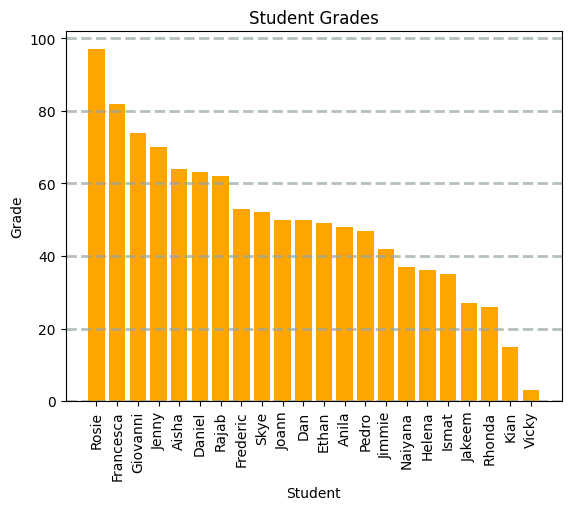

In [35]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

/var/folders/h0/pqnrytyd0xdblgynfs1ppnp00000gn/T/ipykernel_1108/2184257589.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


Text(0.5, 0.98, 'Student Data')

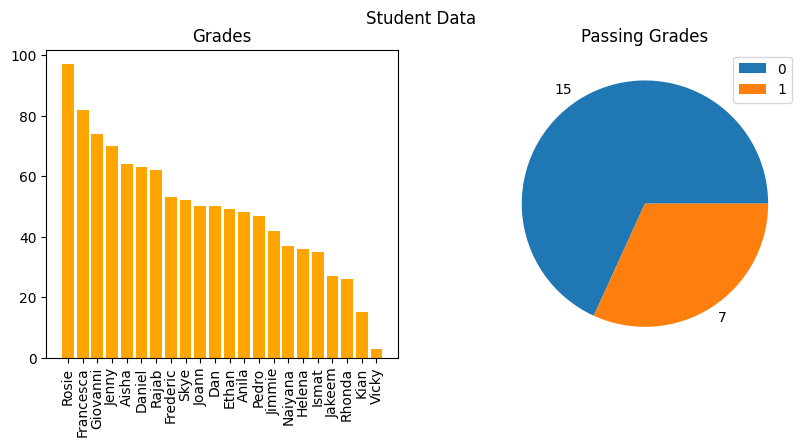

In [36]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
# fig.show()

<Axes: xlabel='Name'>

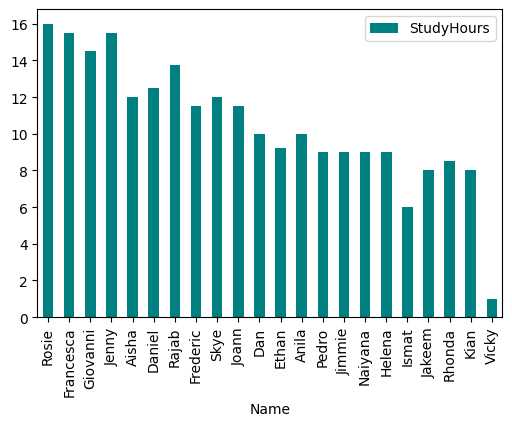

In [37]:
## We could also use pandas, since plotting is foundamental it is implemented in more than one package, of course.
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Statistical Analysis

##### When examining atttributes per se, we are particularly interested in its distribution, "the way different values spread accross the whole sample".
##### The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



Text(0, 0.5, 'Frequency')

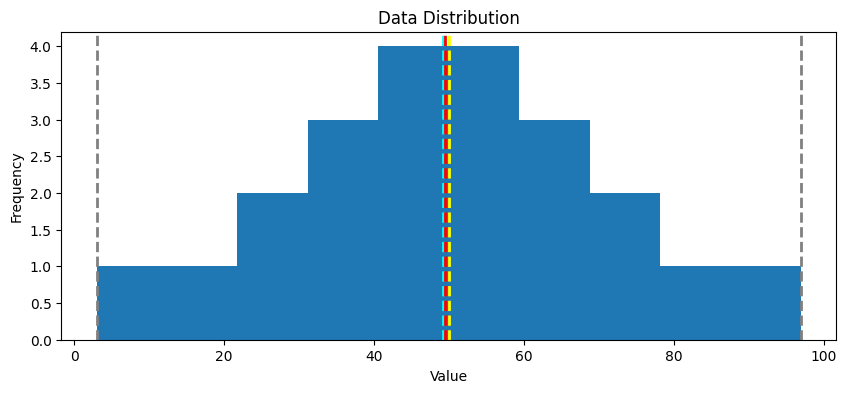

In [39]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
# fig.show()

* Min and Max Values represented with gray lines.
* Mean cyan line
* Median red line
* Mode yellow line

Text(0.5, 1.0, 'Data Distribution')

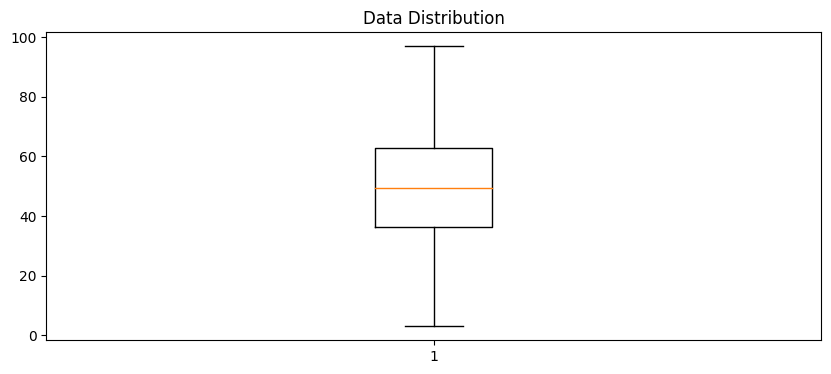

In [41]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
# fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



/tmp/ipykernel_26012/1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


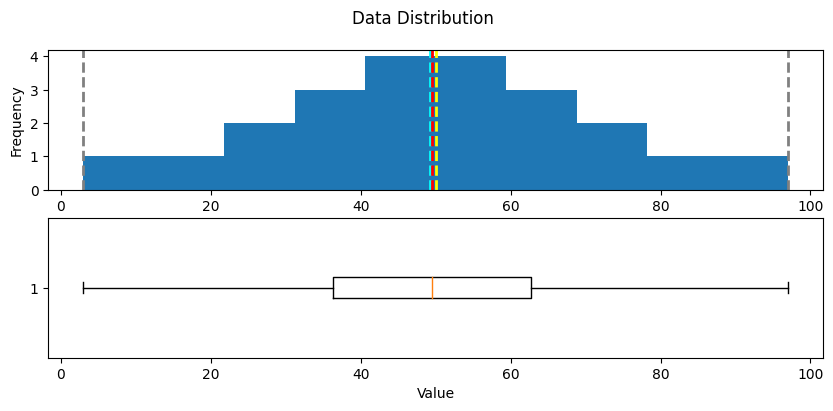

In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

#### From Sample to Population with density

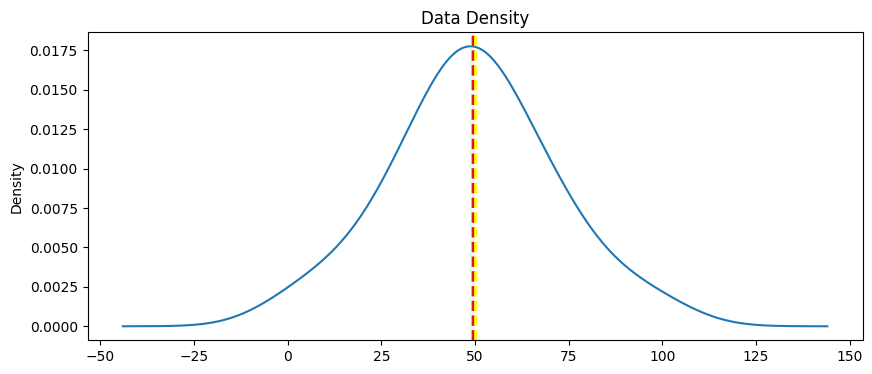

In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

#### Plot density using scipy

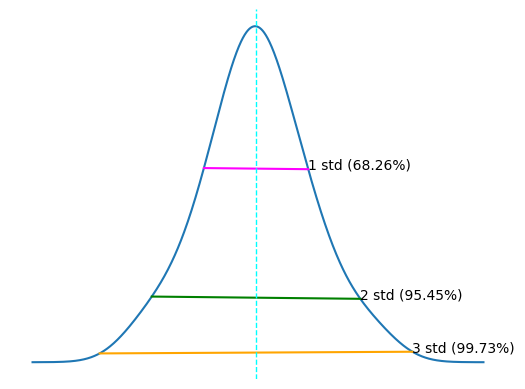

In [ ]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

## EDA statistically with pandas and numpy

In [ ]:
df_students.describe()

,StudyHours,Grade,Pass
count,22.000000,22.000000,22.000000
mean,10.522727,49.181818,0.318182
std,3.487144,21.737912,0.476731
min,1.000000,3.000000,0.000000
25%,9.000000,36.250000,0.000000
50%,10.000000,49.500000,0.000000
75%,12.375000,62.750000,1.000000
max,16.000000,97.000000,1.000000


<AxesSubplot: title={'center': 'StudyHours'}, xlabel='Pass'>

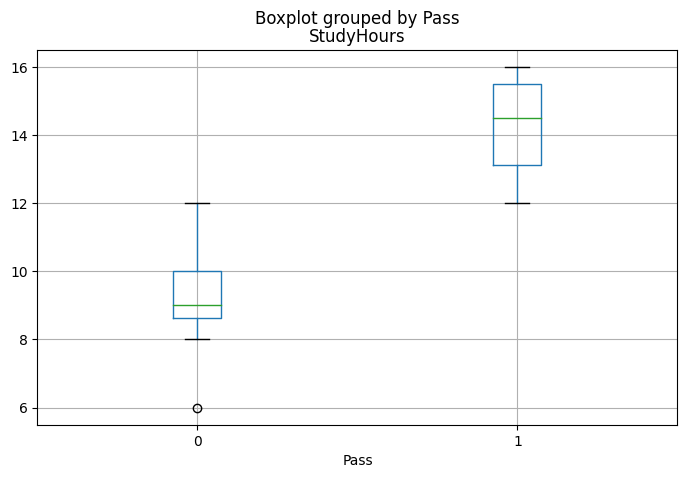

In [ ]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

##### Comparing 2 numerical attributes + scaling

<AxesSubplot: xlabel='Name'>

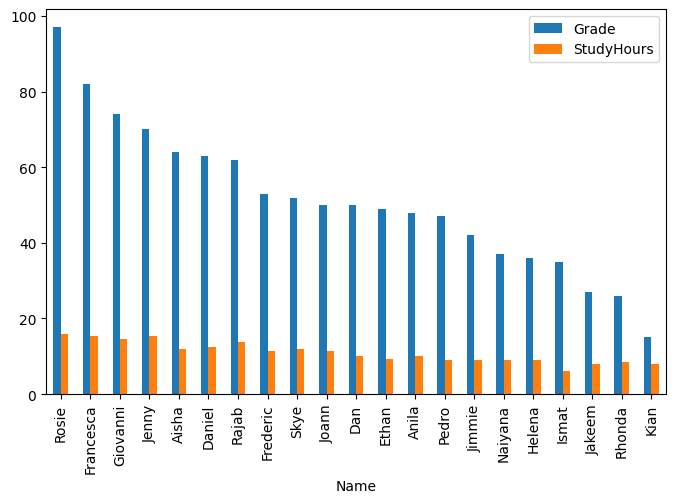

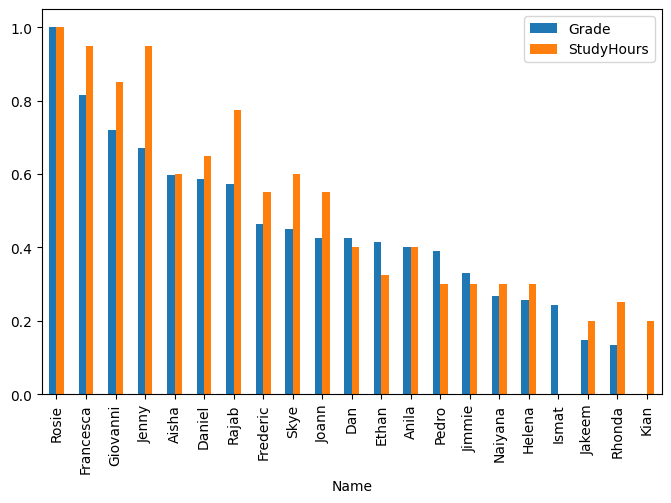

In [ ]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

# However, the 2 attributes do not share the same range of values, therefore we should scale them into the same one.
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

##### With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.
##### In fact, they seem to be positively correlated, can we chech this?

It seems that the correlation between the 2 numeric attributes:  0.9117666413789675 is positvely strong.


<AxesSubplot: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

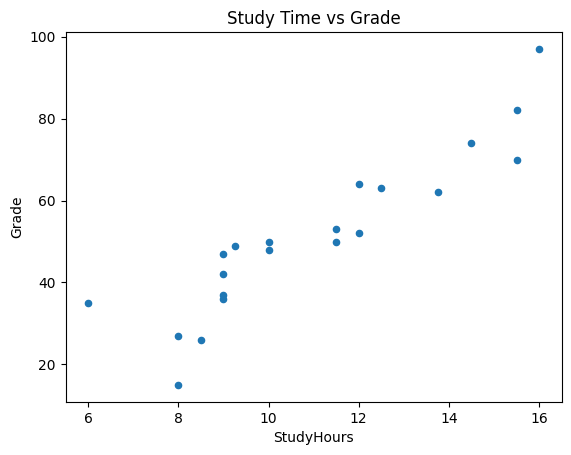

In [ ]:
r_corr = df_normalized.Grade.corr(df_normalized.StudyHours)
print(f"It seems that the correlation between the 2 numeric attributes:  {r_corr} is positvely strong.")

# Create a scatter plot to visualize this correlation
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

### Least squares regression to facilitate the undersanding of such correlation:
#### Line of best fit based on the least squares regression coefficients 

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


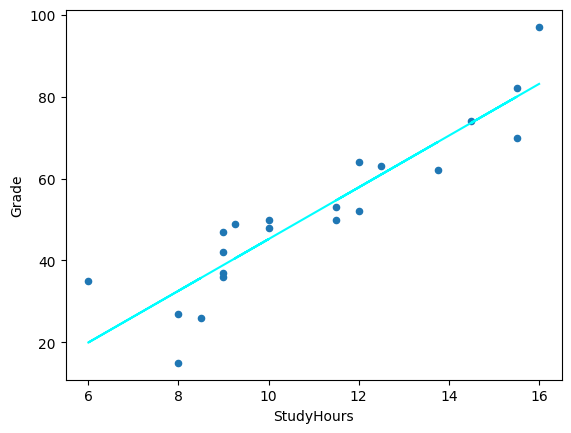

In [ ]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()